# Exploratory Factor Analysis (EFA) demo
This notebook is designed to explain EFA and demonstrate how to perform it in Python.

## Initialization

In [7]:
import numpy as np
import pandas as pd
import pickle as pkl

import sys
sys.path.append('..')
import proj_utils as pu
import efaUtils as utils
from factor_analyzer import FactorAnalyzer
from os.path import join, isdir
from os import getcwd, mkdir

with open("../pData.pkl", "rb") as f:
    pData = pkl.load(f)
seedList = pData['newNames']
catColors = pData['catColors']
coords = pData['coordsMNI']

cdir = getcwd()
    
cpairs = []
pairings = np.arange(0, catColors.shape[0], 2)
for i in pairings:
    cpairs.append([catColors[i, :] , catColors[i+1, :]])

clusterSol = r"./notebook_data/3kSolution.csv"
clustSolDf = pd.read_csv(clusterSol, header=None, index_col=0)
hcols = pu.node_color_generator(catColors, (clustSolDf.values))

## Determine number of factors using PCA

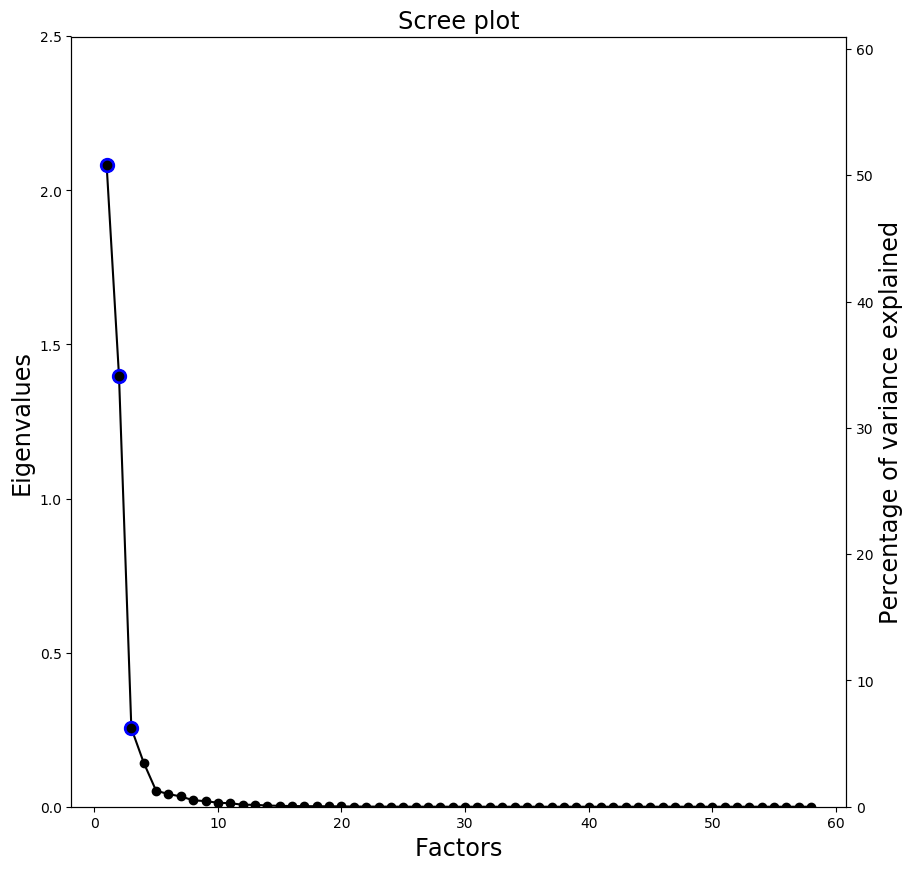

(<Figure size 1000x1000 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x136eab60908>)

In [8]:
file = r"./notebook_data/seed_functional_profiles.csv"
fileDf = pd.read_csv(file,index_col=0)

corr_prep = pd.DataFrame(fileDf.values.T)
corrDf = corr_prep.corr()
data = utils.centerMat(corrDf.values)
dataDf = pd.DataFrame(data, columns=seedList, index=seedList)

eigs, p = utils.permPCA(dataDf.values)
utils.plotScree(eigs, p, kaiser=False)

## Run EFA

C:\ProgramData\Anaconda3\lib\site-packages\nilearn\plotting\displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


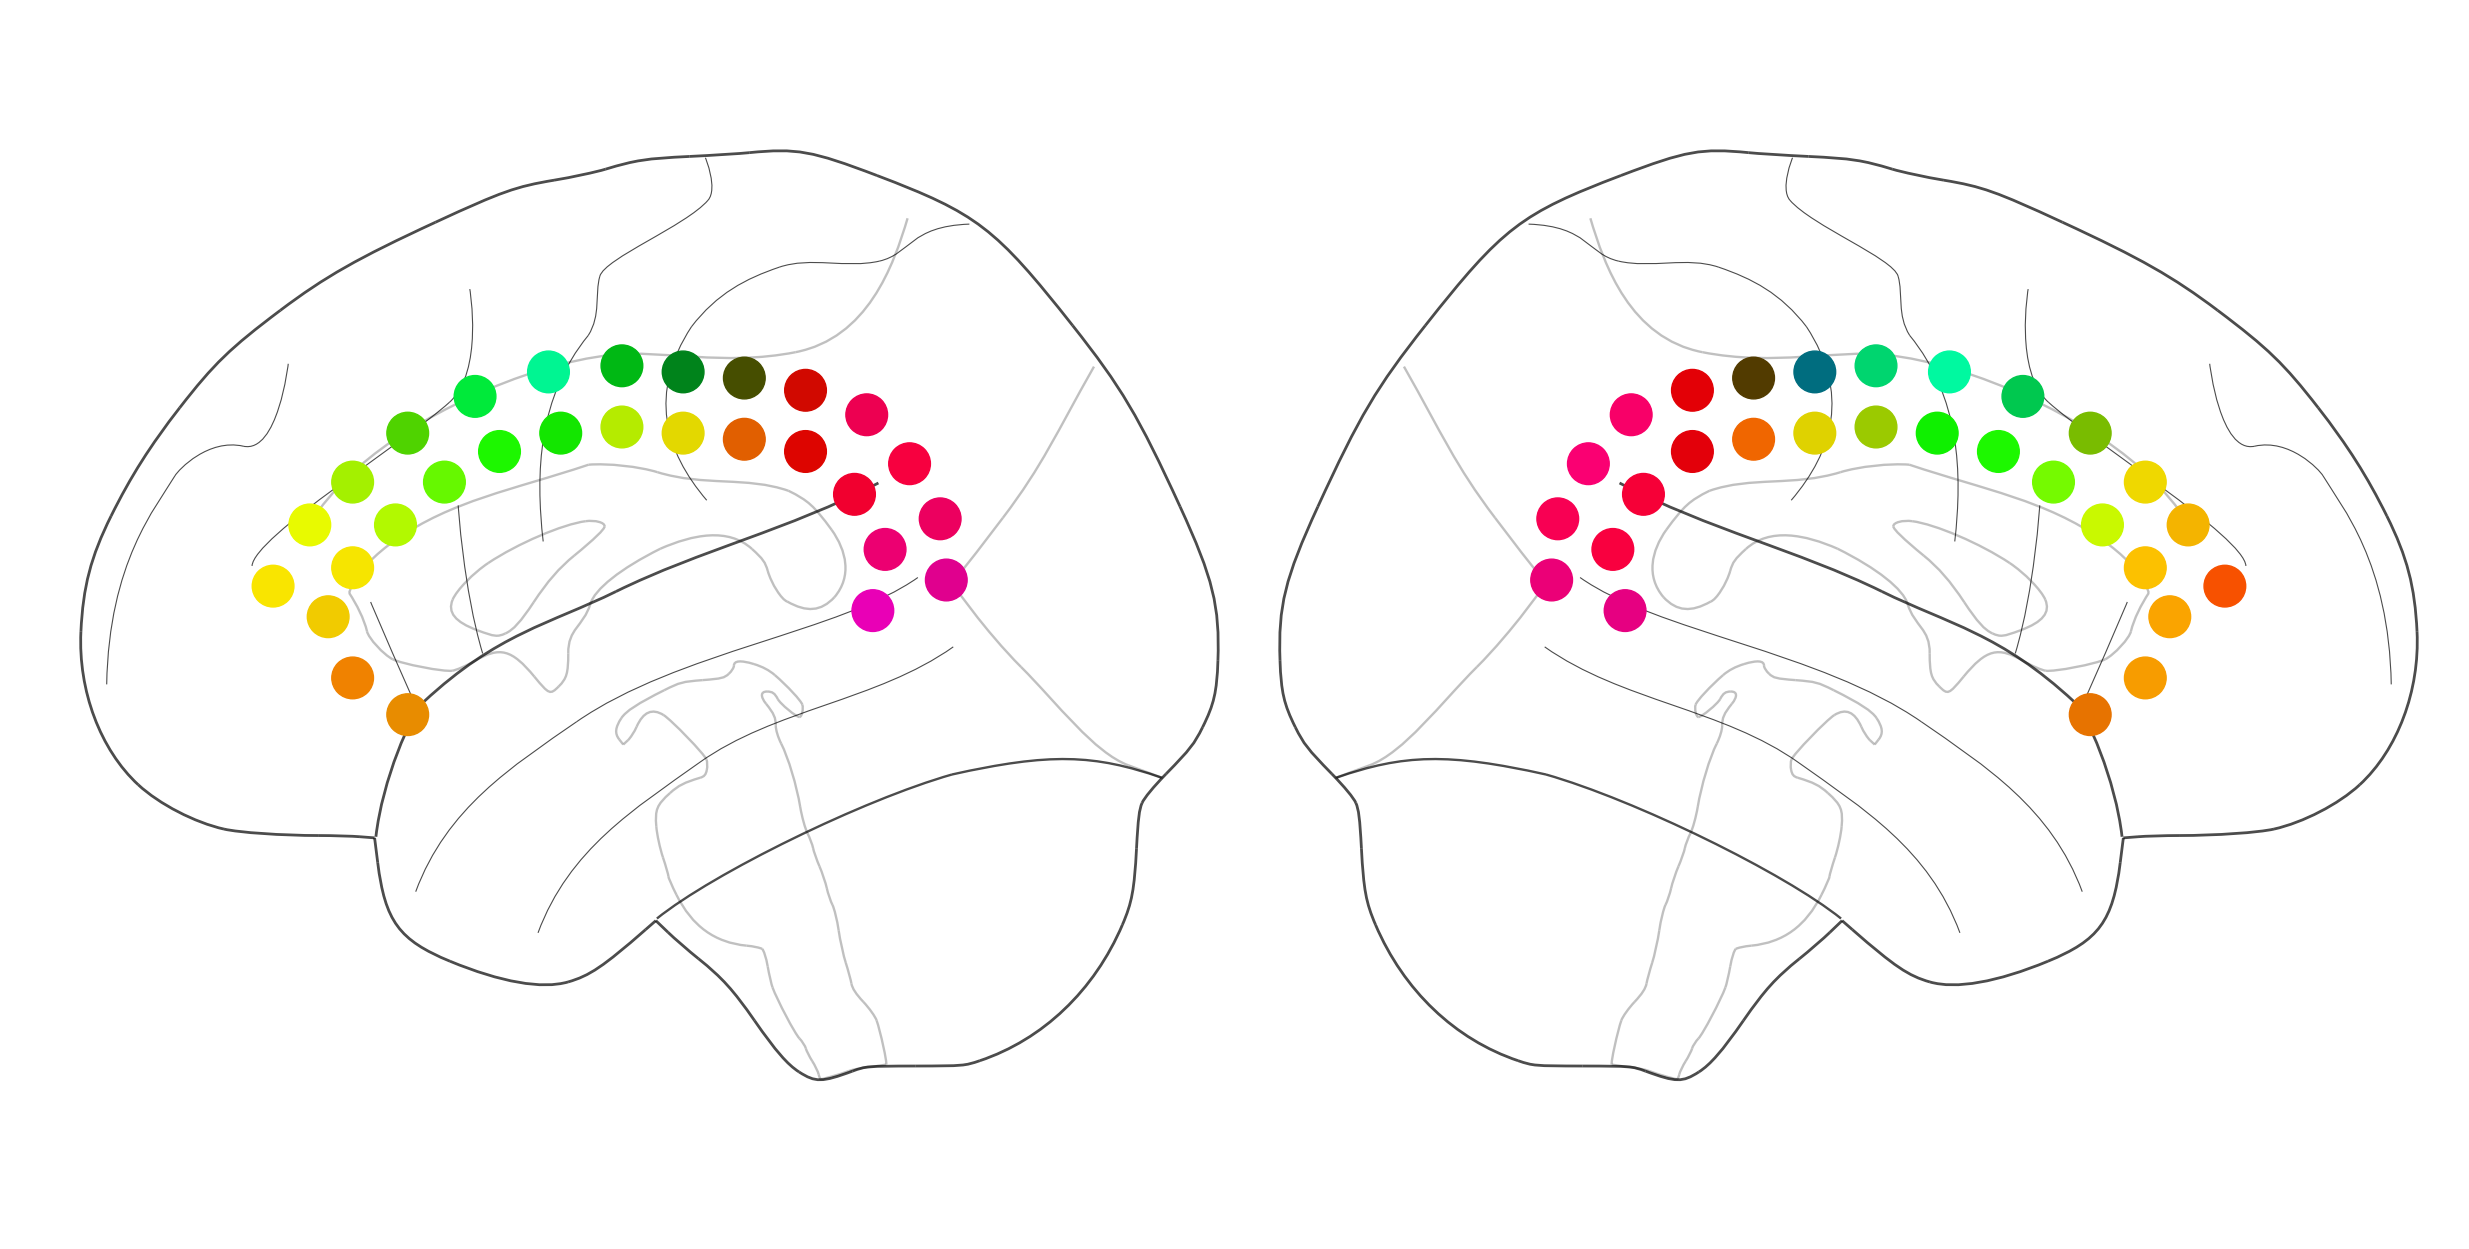

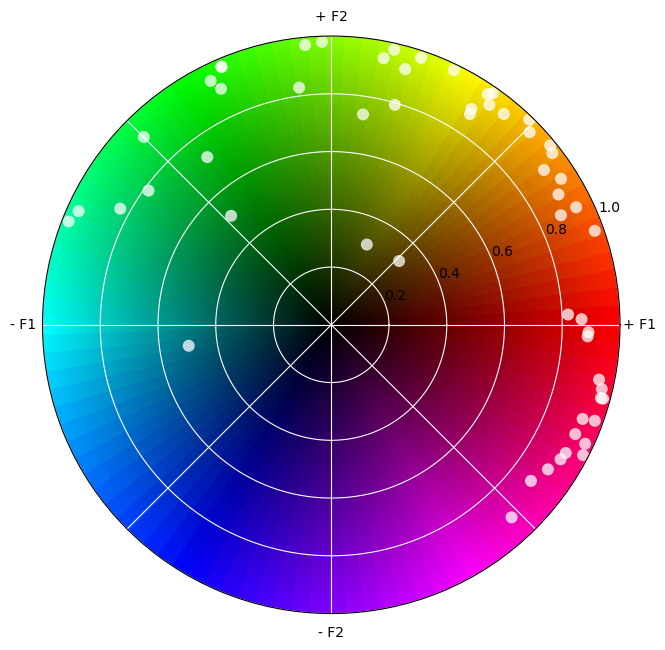

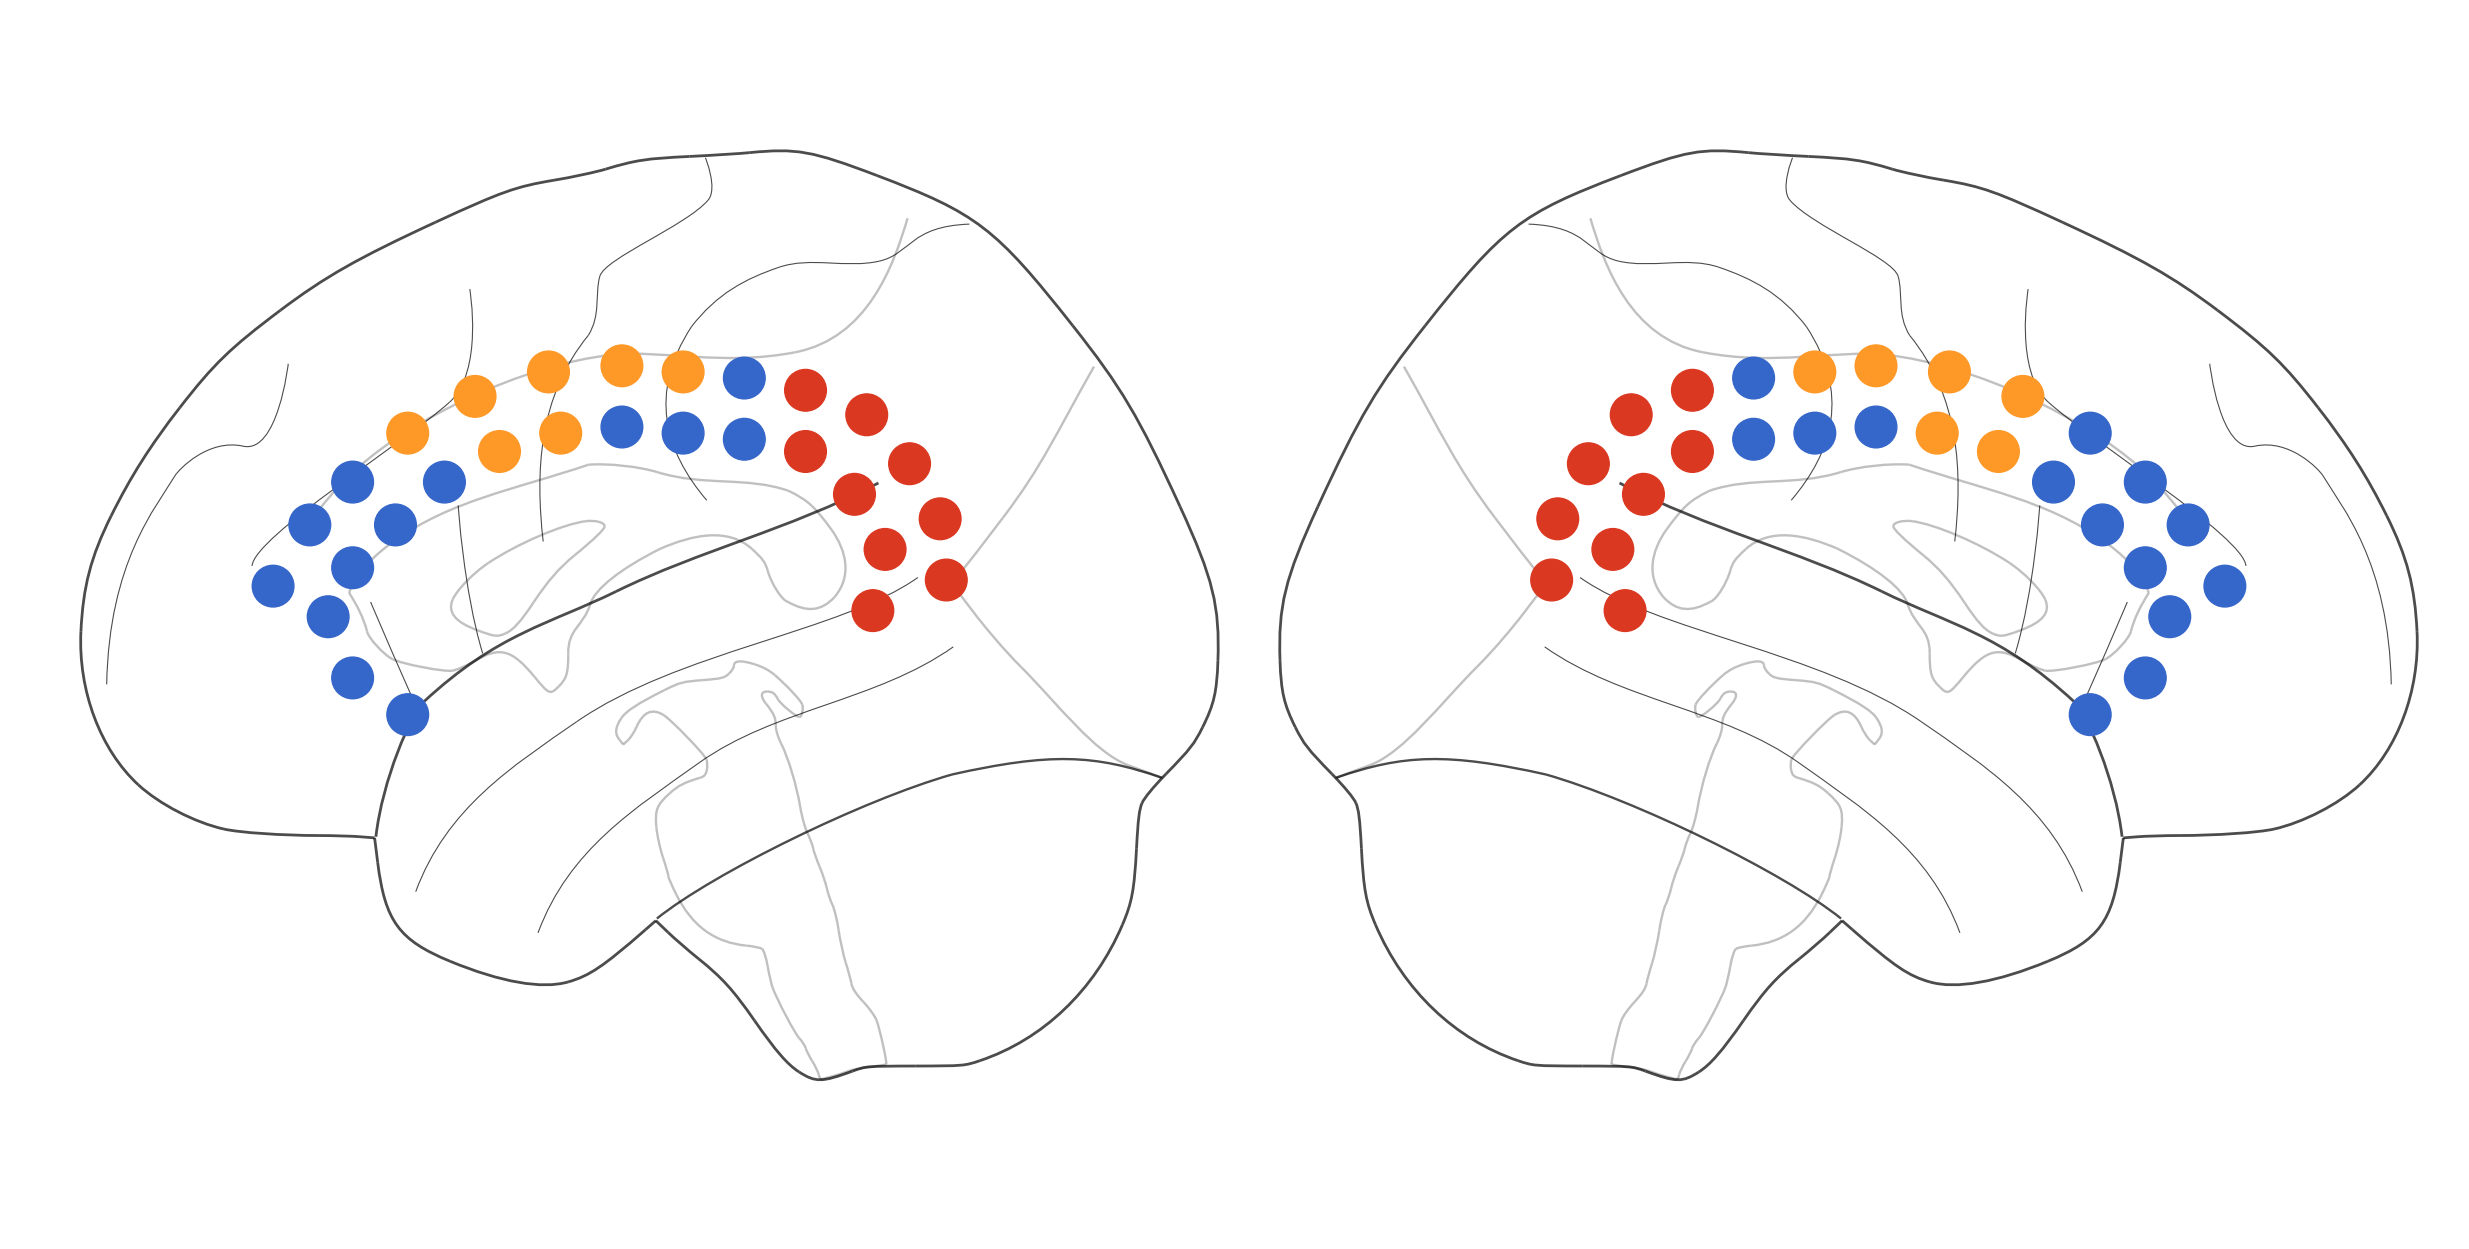

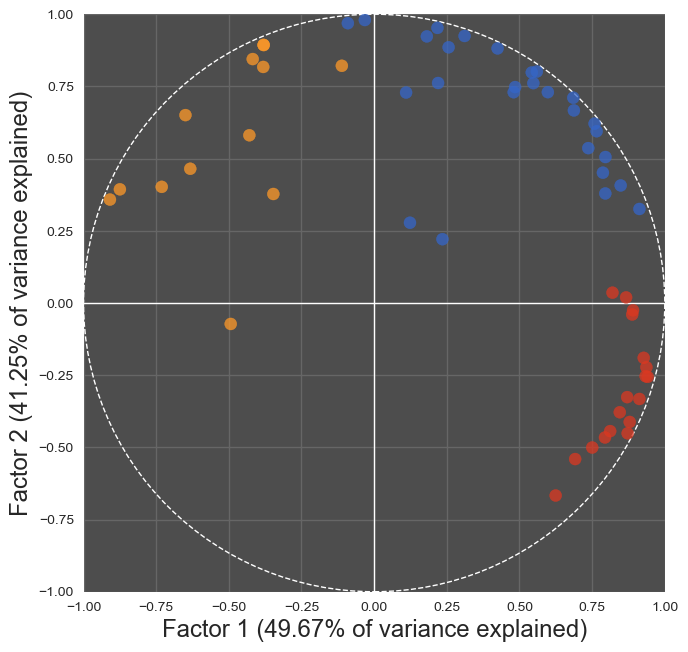

In [9]:
rot = None
fa = FactorAnalyzer()
fa.analyze(dataDf, 3, rot)
loadings = fa.loadings
sqloadings = loadings**2

f = loadings.values[:, 0:2]
orig_eigs, com_eigs = fa.get_eigenvalues()
e = com_eigs.values

R, theta, rgb = utils.createColorSpace(f)
utils.plotBrains(coords, rgb)
utils.createColorLegend(R, theta)
utils.plotBrains(coords, hcols)
utils.plotFS(f, e, 'l', col=hcols)

### EFA + varimax rotation

C:\ProgramData\Anaconda3\lib\site-packages\nilearn\plotting\displays.py:1307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


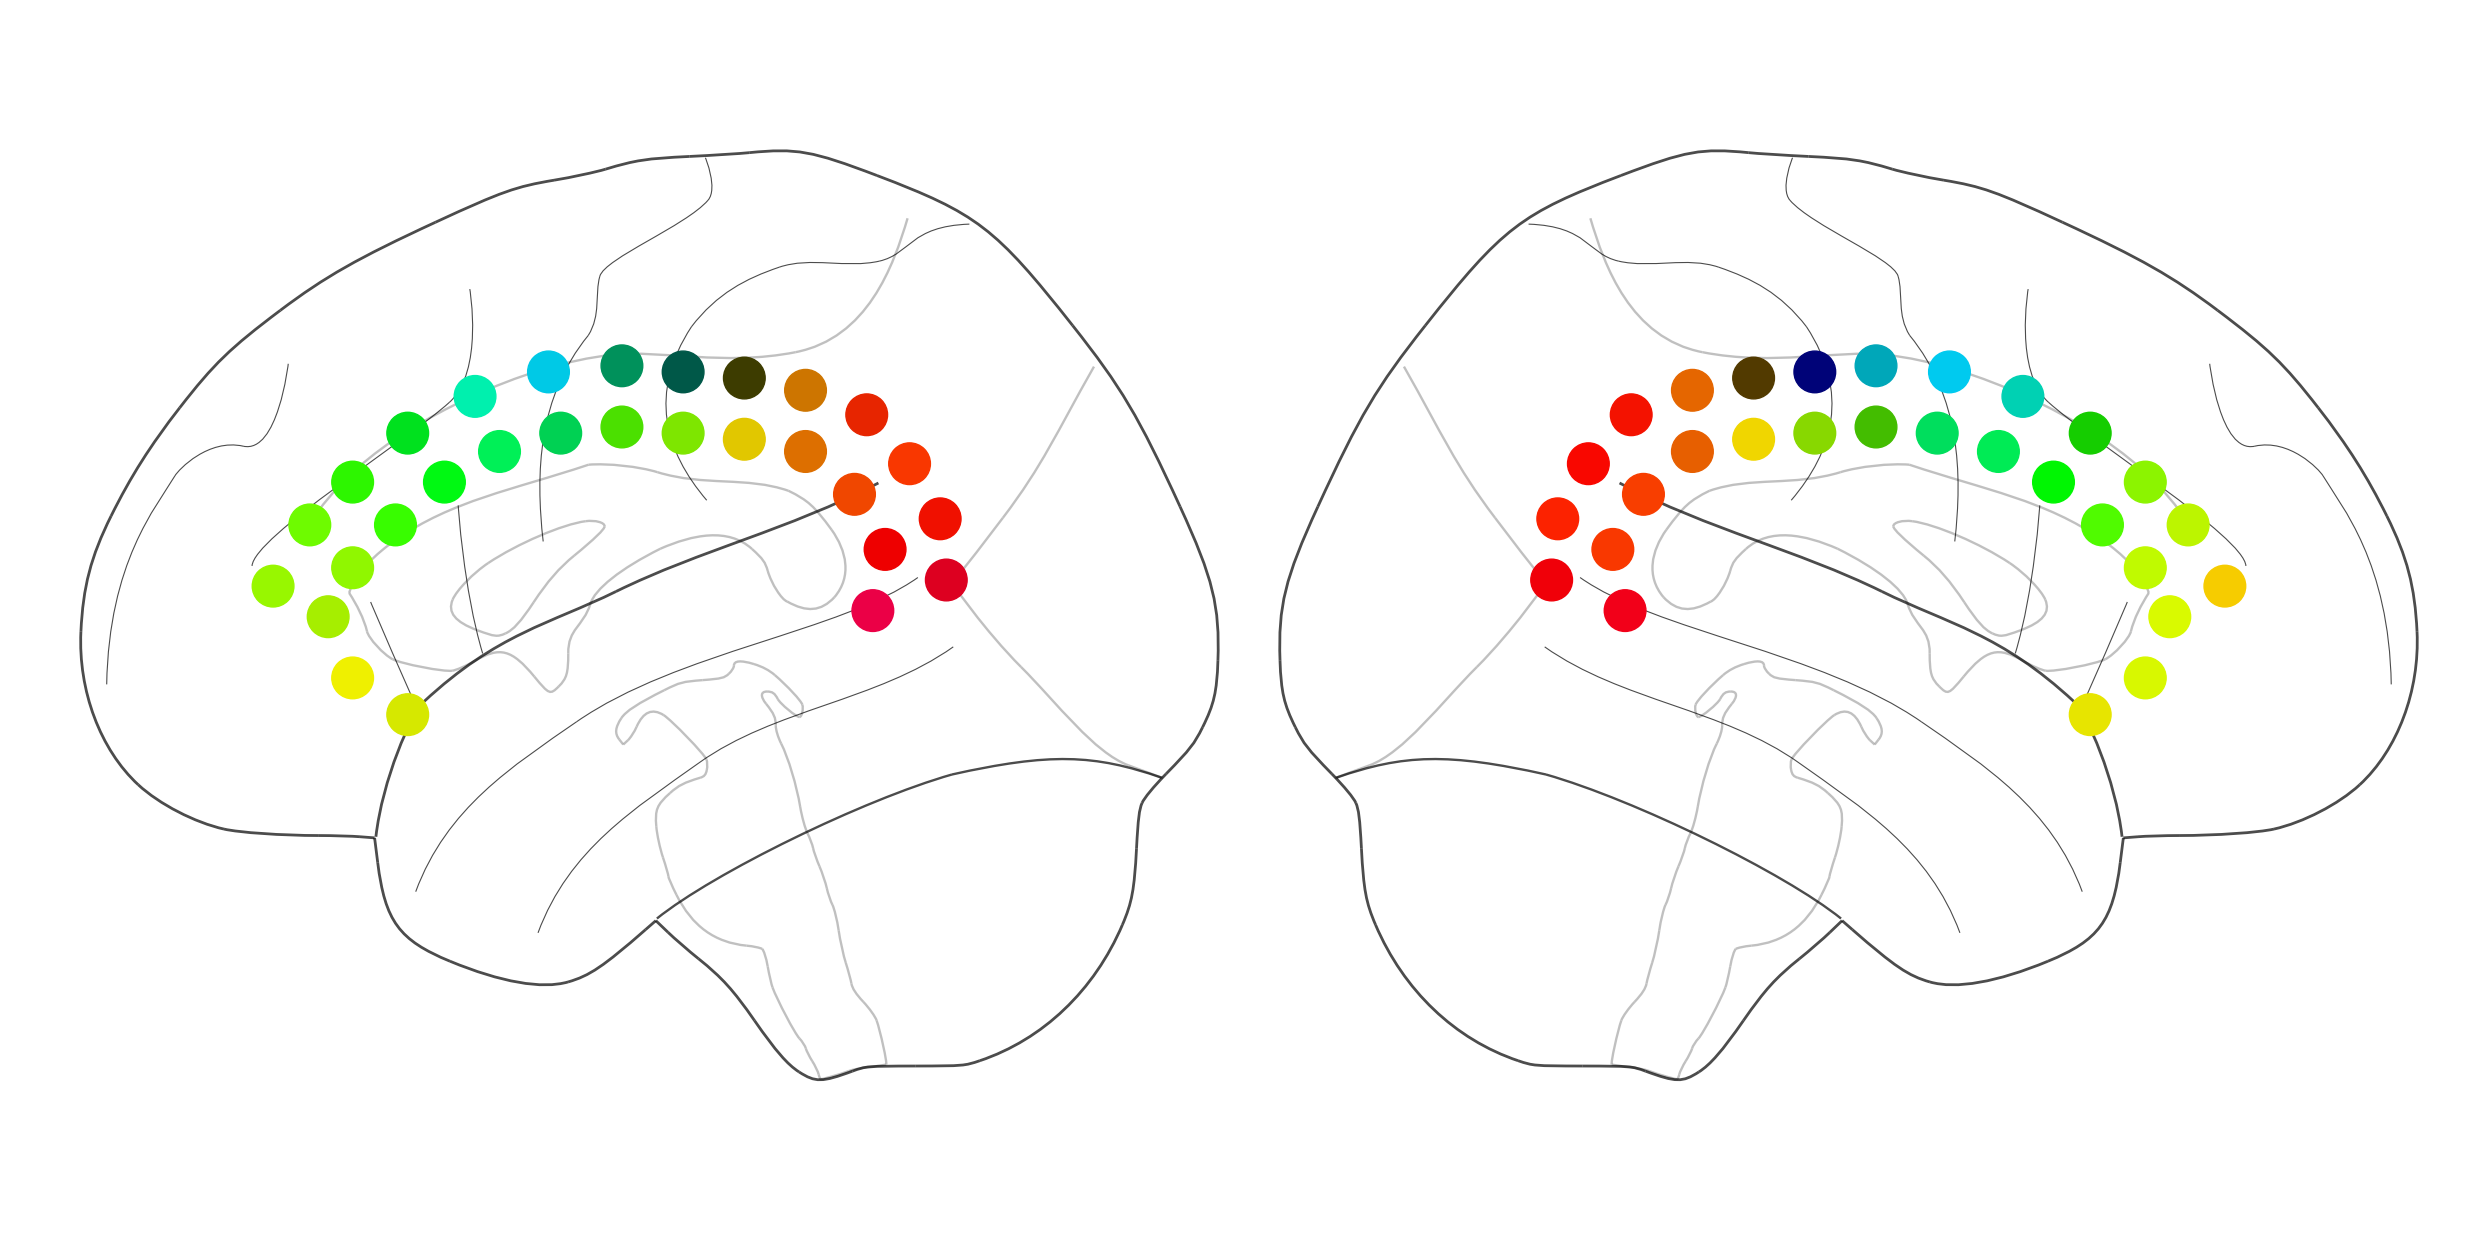

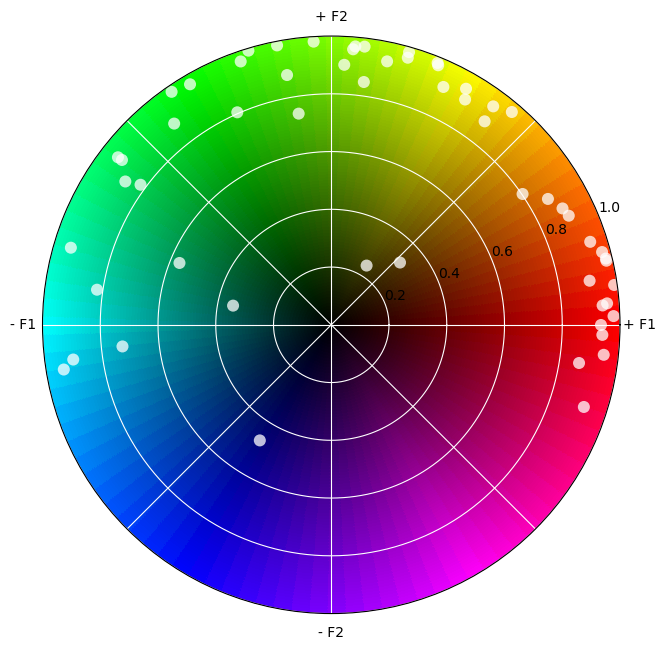

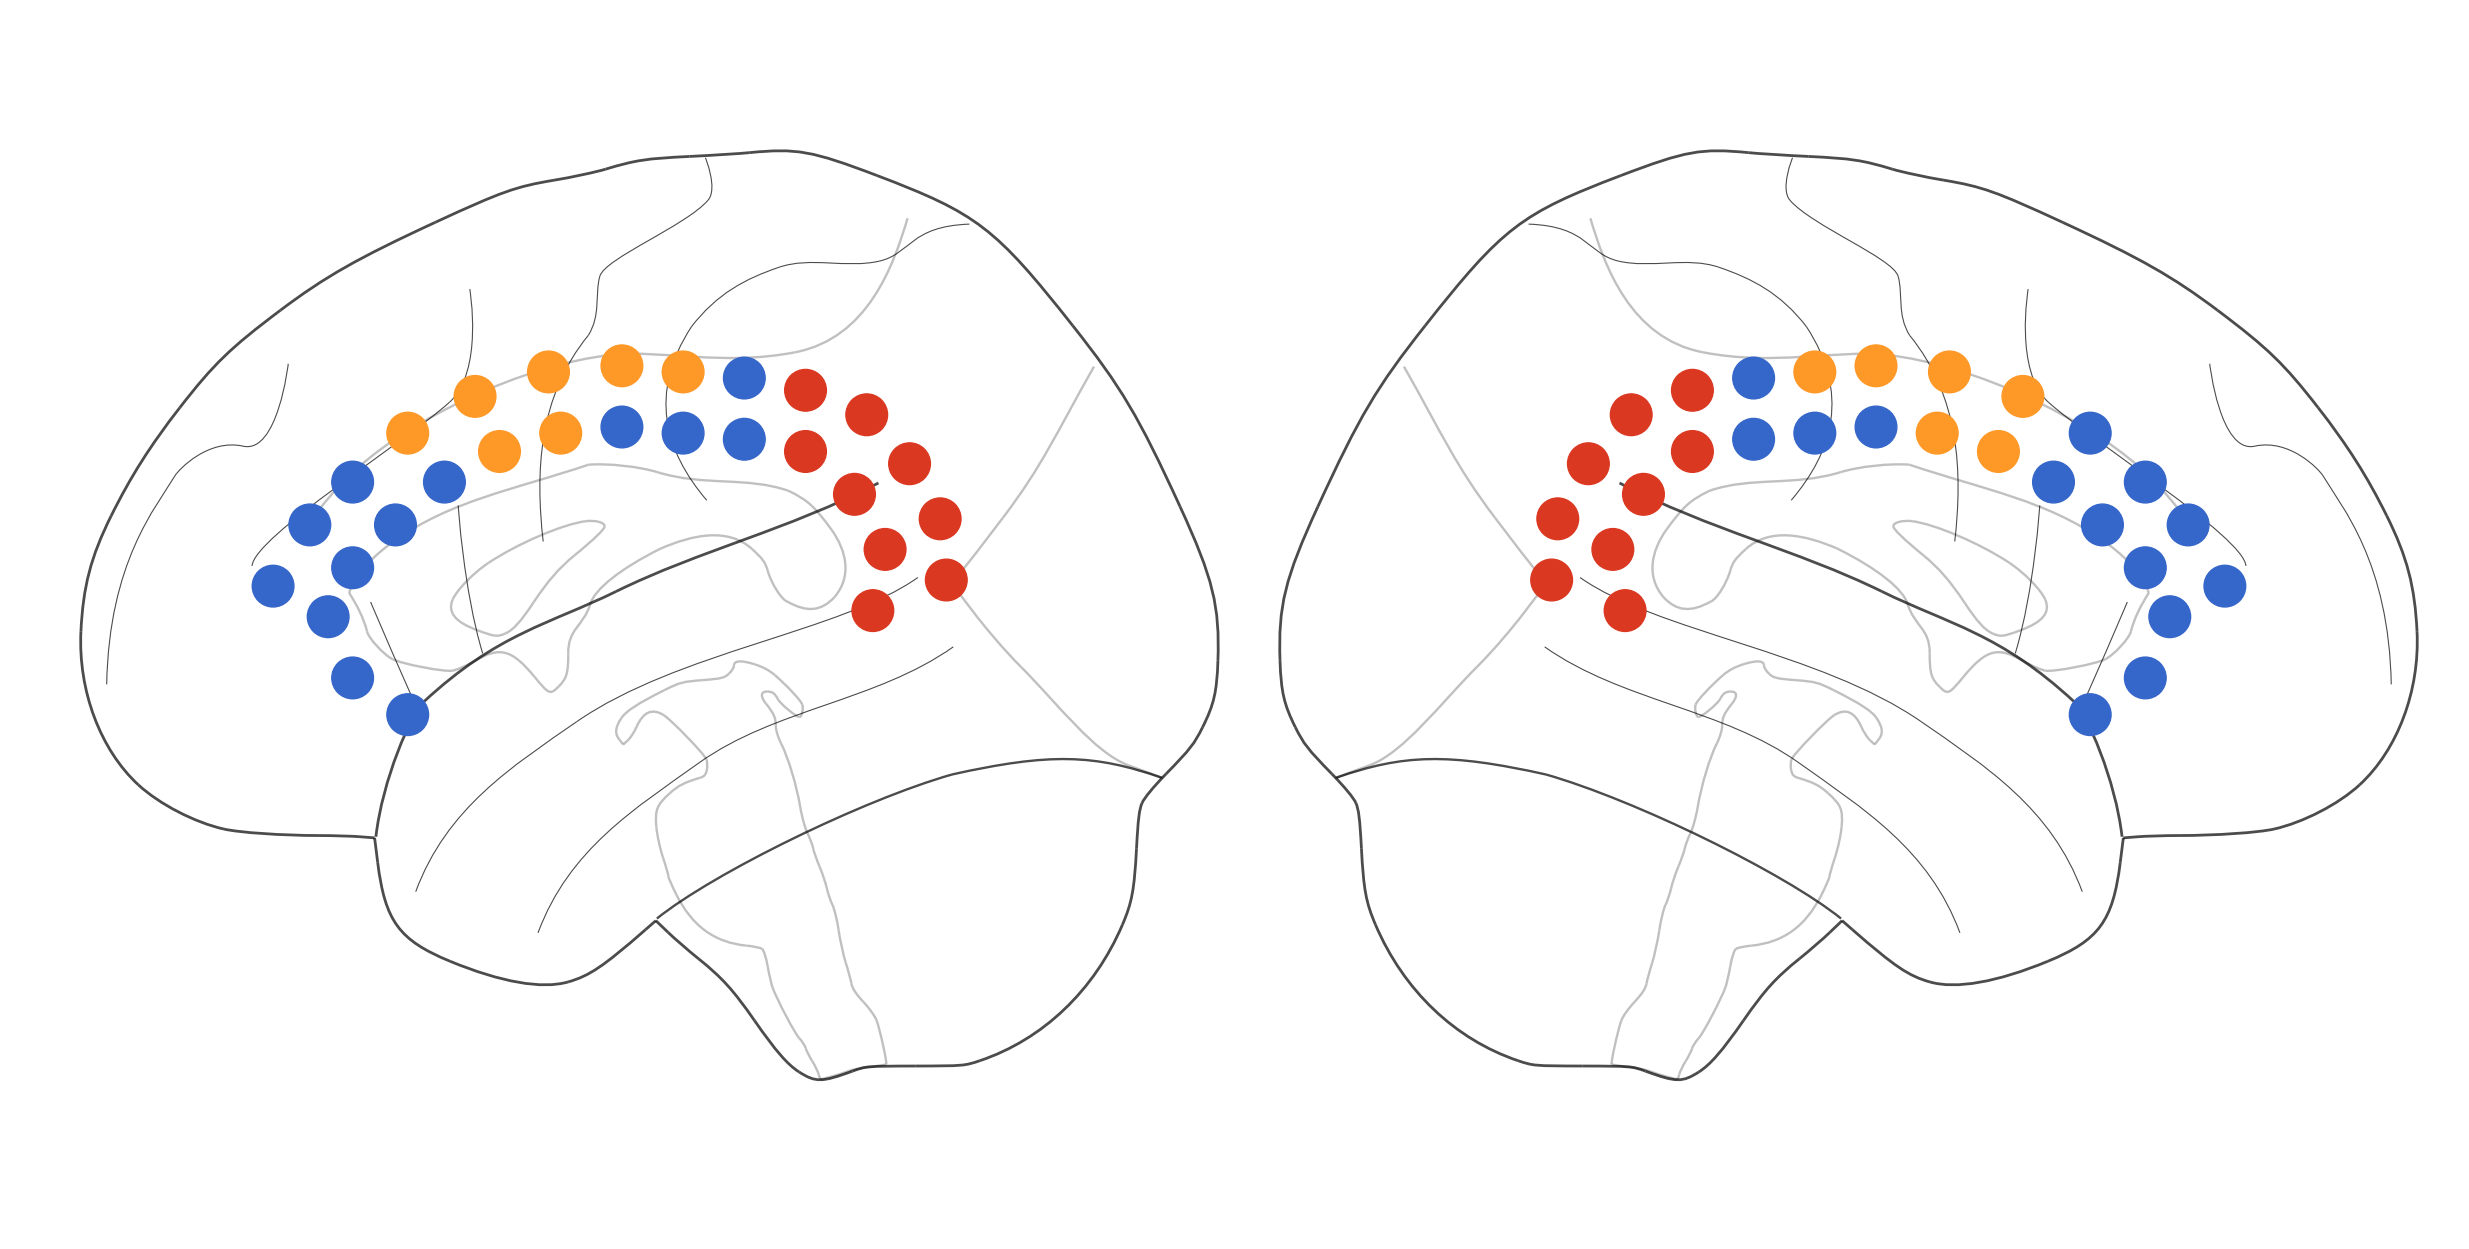

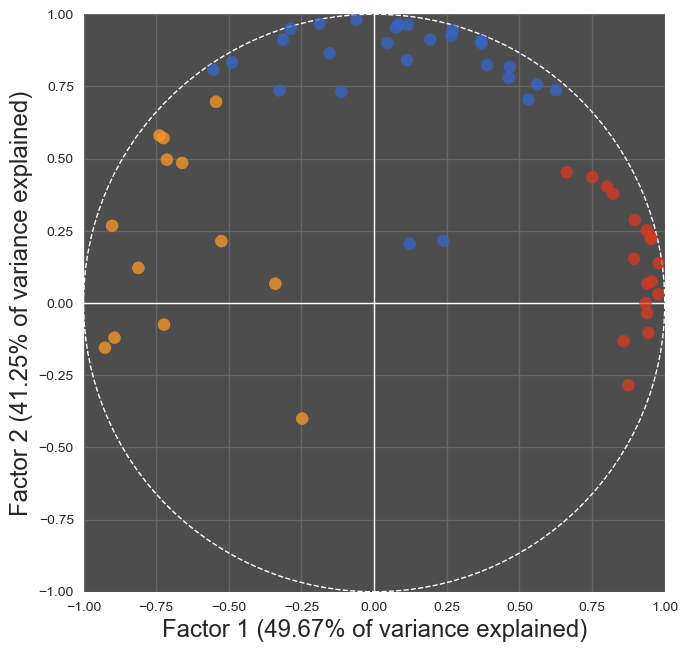

In [10]:
rot = 'varimax'
fa = FactorAnalyzer()
fa.analyze(dataDf, 3, rot)
loadings = fa.loadings
sqloadings = loadings**2

f = loadings.values[:, 0:2]
orig_eigs, com_eigs = fa.get_eigenvalues()
e = com_eigs.values

R, theta, rgb = utils.createColorSpace(f)
utils.plotBrains(coords, rgb)
utils.createColorLegend(R, theta)
utils.plotBrains(coords, hcols)
utils.plotFS(f, e, 'l', col=hcols)